# Ref

https://github.com/SHlee-TDA/PNU_TDA_TUTORIAL

In [3]:

# !pip install -r requirements.txt

In [4]:

#!pip install ipykernel
#!pip install jupyter
#!pip install numpy
#!pip install gudhi
#!pip install matplotlib
#!pip install pandas
#!pip install plotly
#!pip install nbformat
#!pip install scikit-learn

# TDA and Machine Learning Tutorial


## 1. Introduction

위상수학적 데이터 분석(Topological Data Analysis; TDA)는 대수위상수학적 도구를 사용하여, 데이터가 가진 기하학적 특징을 분석하고 활용하는 새로운 데이터 분석 기법입니다.

TDA는 기존에 통계학과 같이 빈도주의에 따른 기법들에서 쉽사리 분석하기 힘들었던 데이터의 기하학적 구조를 분석하는 도구들을 제공합니다.

현재 TDA는 의료 이미지 분석, 네트워크 분석, 재료공학 구조 분석, 시계열 분석, 중력파 분석, 머신러닝, 딥러닝 등에 활발히 응용되고 있습니다.

이번 튜토리얼에서는 TDA를 활용해 데이터에서 기하학적 특징을 추출하고, 그것을 머신러닝에 응용하는 방법에 대하여 배워보도록 하겠습니다.



## 2. Persistent Homology




### 2.1) Motivation 

<figure align = 'center'>
<img src = 'https://og-data.s3.amazonaws.com/media/artstory/post_image/50/4.jpg'>
<figcaption> Georges Seurat, A Sunday on La Grande Jatte, 1884-1886. </figcaption>
</figure>

위 그림은 조르주 쇠라의 <그랑드자트 섬의 일요일 오후>라는 그림입니다.

이 그림은 멀리서 보기엔 연속적인 곡선과 면으로 이루어진 그림 같지만, 자세히 보면 이 그림은 무수히 많은 점들로 이루어진 그림입니다.

사람의 눈과 뇌는 이 무수히 많은 점을 보면서 이산적으로 느끼기보다는 연속적인 곡선과 색감으로 인식합니다.

만일, 우리가 인간을 닮은 인공지능을 개발한다고 하면 이러한 인간의 능력을 컴퓨터에게 부여하는 일은 굉장히 중요할 수 있습니다.

컴퓨터는 모든 데이터를 이산적으로 받아들이기 때문입니다.

어떻게 하면 컴퓨터가 이산적인 데이터로부터 연속적인 성질을 인식하도록 할 수 있을까요?


####  **Bridge between Discreteness and Continuousness**

위상수학적 데이터 분석은 Persistent homology(PH)라는 도구를 사용해 이산적인 데이터로부터 데이터의 기하학적 성질을 추론합니다.

PH의 엄밀한 정의와 성질을 설명하기에 앞서서, 데이터의 기하학적 특징을 추출한다는 것을 살펴보고자 합니다.

이를 위해서는 데이터가 가진 성질과 기하학이 가진 성질 사이의 차이를 이해할 필요가 있습니다.


<figure align = 'center'>
<img src = 'https://editor.analyticsvidhya.com/uploads/75809Computer-vision1.png'>
<figcaption> 컴퓨터가 보는 고양이 사진. (이미지 출처 : <a href='https://indatalabs.com/blog/how-does-computer-vision-work'>InData Labs </a>) </figcaption>
</figure>

이미지 데이터를 생각해봅시다.

이미지 속의 강아지나 고양이는 본래 실세계에선 연속적인 형태를 띄는 대상입니다.

그렇기 때문에 우리는 강아지와 고양이의 모양이 가지는 기하학적 성질을 수학적으로 잘 정의하고 계산할 수 있습니다.

그러나, 이미지 데이터는 실세계에 있던 연속적인 대상을 이산적으로 샘플링 한 것이라고 볼 수 있습니다.

이미지 데이터는 픽셀에 실세계 대상이 가지고 있던 시각적 정보를 요약하고 압축하여 저장합니다.

그러므로 데이터화된 이미지에서 본래 사진 안에 있던 강아지와 고양이가 가진 기하학적 성질을 수학적으로 정의하고 계산하기란, 그리고 그것이 대량의 데이터에 일관되게 적용되는 방법을 생각하는 일은 쉬운 일이 아닙니다.

요컨대 데이터는 이산적인 표본의 성질을 띄며, 기하학은 연속적인 성질을 띄기 때문에 이들 각각을 다루는 수학적인 방법에 차이가 있습니다.


그럼에도 불구하고 사람에게는 이산적인 정보로부터 연속적인 대상을 생각하고 그 성질을 인식하는 사고능력이 있습니다.

이러한 사고과정을 이산적인 데이터가 사실은 매끄러운 기하학적 대상(다양체; Manifold)으로부터 표본추출된 것이라고 생각하고, 매끄러운 기하학적 대상이 가지고 있던 성질을 이산적인 데이터로부터 추론하는 것이라고 이해할 수 있습니다.

이러한 방법론을 기하학적 추론(Geometric inference)라고 합니다.

위상수학적 데이터 분석은 Persistent homology를 이용해 기하학적 추론을 수행합니다.




#### **Geometric Inference**

<figure align = 'center'>
<img src = 'https://github.com/SHlee-TDA/TDA_coding/blob/master/images/pers_hom03.png?raw=true' width = 600>
<figcaption> 기하학적 추론과 통계적 추론의 비교 </figcaption>
</figure>


기하학적 추론은 통계학에서 표본을 통해 모집단의 성질을 추론하는 통계적 추론(Statistical inference)와 비교한다면, 그 철학을 이해하기가 쉬울 것입니다.

통계학에서는 표본평균과 표본표준편차와 같은 통계량으로부터 모집단의 모평균과 모표준편차와 같은 모수를 추론했던 것과 유사하게, 위상수학적 데이터 분석에서는 데이터의 PH로부터 모집단 다양체가 가지는 호몰로지를 추론합니다.




호몰로지가 매끄러운 다양체의 성질을 이해하고 분류하는 데에 중요한 역할을 한다는 것은 수학자들에게 익히 알려진 사실입니다.

그러므로, 이산적인 데이터로부터 호몰로지를 추정하는데 사용되는 Persistent homology는 호몰로지와 마찬가지로 데이터의 기하학적 성질을 이해하고 데이터를 기하학적인 구조로 분류하는 데에 중요한 역할을 할 수 있다고 생각할 수 있습니다.


### 2.2) Definition

#### **Scale selection issue**

위상수학은 연결성(connectedness)에 대해 연구하는 수학이라고 할 수 있습니다.

연결성은 위상공간의 연결성분(connected component), 구멍(loop), 빈 공간(void) 그리고 이것들의 일반화된 구멍의 개수로 나타내어 집니다.

이러한 정보를 잘 담고 있는 수학적 대상이 위상공간의 호몰로지(homology)입니다.

그러나 데이터에서 호몰로지를 이용해 이러한 정보를 추출하고자 하면, 데이터들은 이산적으로 모두 떨어져(disconnected)있기 때문에 유용한 정보를 얻기 어렵습니다.

그래서 기존의 사람들은 데이터들을 적당한 거리 파라미터 $\epsilon$을 기준으로, $\epsilon$이내에 있는 점들끼리 연결한 후 호몰로지를 계산해왔습니다.





#### **Filtration**


이 방법에는 한 가지 문제점이 있는데, 파라미터 $\epsilon$의 값이 얼마일 때 데이터의 기하학적인 정보를 가장 잘 나타내는지에 대한 기준이 없었습니다.

순전히 연구자의 주관과 경험에 따를 수 밖에 없었으며, 이는 빅데이터를 분석하는데에 굉장한 리스크가 되었습니다.

<figure align = 'center'>
<img src = 'https://github.com/SHlee-TDA/TDA_coding/blob/master/images/simplicial05.png?raw=true'>
<figcaption> Persistent homology는 필트레이션을 이용해 데이터로부터 심플리셜 컴플렉스의 진화과정을 만들고, 그 과정 중에 연결성분(파란 막대)이나 구멍(점선)의 지속성을 측정한다. [이미지 출처 : Figure 1 in Otter, Nina, et al. "A roadmap for the computation of persistent homology." EPJ Data Science 6 (2017)] </figcaption>
</figure>

Persistent homology(PH)는 필트레이션(filtration)과 함자성(functoriality)를 이용해 이러한 약점을 극복합니다.

먼저 파라미터 $\epsilon$을 점점 증가시켜가면서 데이터를 연결해나가면, $\epsilon$에 대한 심플리셜 컴플렉스의 축소나열(nested sequence) $X_{\epsilon_0} \subset X_{\epsilon_1} \subset \cdots \subset X_{\epsilon_n} \subset \cdots $ 를 얻습니다.

각 심플리셜 컴플렉스 $X_\epsilon$이 가진 연결성에 대한 정보는 그것의 호몰로지 클래스(homology class)로 포함됩니다.

필트레이션 안에서 호몰로지 클래스는 함자성(functoriality)에 의해 효과적으로 그 진화과정을 추적할 수 있습니다.

함자성은 심플리셜 컴플렉스들의 축소나열 $X_{\epsilon_0} \subset X_{\epsilon_1} \subset \cdots \subset X_{\epsilon_n} \subset \cdots $를 연결하는 포함사상(inclusion map)을  호몰로지의 축소나열 $H_k(X_{\epsilon_0}) \rightarrow H_k(X_{\epsilon_1}) \rightarrow \cdots \rightarrow H_k(X_{\epsilon_n}) \rightarrow \cdots $로 자연스럽게 변환시킵니다. 

이렇게 얻은 호몰로지의 축소나열에서 $\epsilon'<\epsilon$에 대하여, 사상 $f_{\epsilon'}^{\epsilon} : H_k(X_{\epsilon'}) \rightarrow H_k(X_{\epsilon})$의 상 $\text{im}{f_{\epsilon'}^{\epsilon}}$를 Persistent homology라고 정의합니다. 

Persistent homology $\text{im}{f_{\epsilon'}^{\epsilon}}$는 $X_{\epsilon'}$가 가진 호몰로지 클래스가 $X_\epsilon$에서 지속되는지(persist) 또는 소멸하는지(death)를 추적할 수 있게 해줍니다.

또한, 낮은 차원의 심플렉스들이 연결되면서 높은 차원의 새로운 연결성이 탄생(birth)한 것을 발견하게 해주기도 합니다.


####  **Persistence**


이렇게 하면 데이터가 가진 연결성이 어느 파라미터값에서 탄생하고 소멸했는지를 구간 $[b,d]$로 나타낼 수 있습니다.

이 구간들의 모임을 Persistence Barcode(PB)라고 부릅니다.

PB에서 긴 수명(lifespan)를 가지는 호몰로지 클래스는 대부분의 파라미터 값에 대해서 데이터가 지니고 있는 내재적 기하학적 특성이므로, 이를 데이터가 추출된 다양체가 가졌던 호몰로지의 추정치로 사용할 수 있을 것입니다.

반면에, 짧은 수명을 가진 호몰로지 클래스는 노이즈로 간주됩니다.


이처럼 PH를 이용하면 손쉽게 파라미터의 의존성을 벗어난 데이터의 요약을 얻을 수 있습니다.

PH의 장점은 이뿐만이 아닙니다.

PH를 계산하는 과정은 선형대수학을 이용하여 수행할 수 있으므로, 자동화된 컴퓨팅을 이용한 데이터 분석에 적합합니다.

뿐만 아니라, PH는 노이즈에 대해 견고한(robust)한 특징을 지니고 있습니다. [Cohen steiner, Stability of Persistence Diagrams, 2007]

즉, 데이터에 노이즈가 다소 첨가되더라도 긴 수명을 가진 호몰로지 클래스에 대한 정보는 크게 변하지 않습니다.

이러한 특성은 노이즈가 많은 현실의 데이터를 분석하는 데에 굉장히 유용한 역할을 합니다.


## 3. Programing Practice

앞서 PH는 매끄러운 다양체가 가진 호몰로지의 추정량처럼 생각할 수 있다고 했습니다.

다음 예제들은 호몰로지가 잘 알려진 대표적인 매끄러운 다양체들(구면, 토러스, 뫼비우스의 띠, 클레인 병)에서 샘플된 점들로부터 PH를 얻어볼 것입니다.

이를통해 데이터로부터 얻은 PH가 어떤 방식으로 데이터의 기하학적 성질을 표현하는지 살펴볼 수 있을 것입니다.

이 작업을 위해 Python의 TDA를 위한 라이브러리 `gudhi`를 사용할 것입니다.

### 3.1) Point cloud

Point cloud 데이터는 3차원 공간 상에 샘플된 점들로 구성된 데이터입니다.

Lidar 센서와 같이 3차원 공간을 인식하는 기기로부터 얻은 데이터들이 주로 point cloud 형태로 저장됩니다.

구면, 토러스, 뫼비우스의 띠, 클레인 병 모양의 실제 사물로부터 센서를 이용해 point cloud 데이터를 얻은 상황을 가정합시다.

각 데이터는 1000~2000개 사이의 점을 샘플링 하여 얻어진 것이며, 기계이기 때문에 조그만 노이즈도 포함되어 있습니다.

이런 데이터로부터 원본 사물의 모양을 특징지을 수 있는 정보를 만들어낼 수 있을까요?

In [ ]:
# Library import
import numpy as np
import gudhi
import matplotlib.pyplot as plt
from utils.generate_data import PointCloud
from utils.plotting import plot_point_cloud

data_generator = PointCloud(n_samples = 1, n_points = 'random', noise=0.05)

# Generate point cloud data.
S_data = data_generator.sphere()          # data from Sphere
T_data = data_generator.torus()           # data from Torus
M_data = data_generator.mobius()          # data from Mobius band
K_data = data_generator.klein_bottle()    # data from Klein bottle

ModuleNotFoundError: No module named 'utils'

In [ ]:
# Visualization : Sphere
plot_point_cloud(S_data[0])

NameError: name 'plot_point_cloud' is not defined

In [3]:
# Visualization : Torus

In [4]:
# Visualization : Mobius band

In [5]:
# Visualization : Klein bottle

위 데이터 시각화에서 살펴볼 수 있듯, 데이터는 각 다양체들 위에서 샘플링 된 이산적인 점들의 집합입니다.

우리의 눈으로는 이 점들이 어떠한 다양체의 기하학적 경향성을 띄는 것이 보일 것입니다.

PH를 이용하면 이러한 경향성을 잘 요약하여 컴퓨터에 입력할 수 있는 자료형으로 나타낼 수 있습니다.

## 3.2) Persistence Barcode and Diagrams

`gudhi` 라이브러리를 이용하면 다음의 단계를 거쳐서 point cloud 데이터로부터 PH를 계산하여 줍니다.

1. 립스 컴플렉스 생성 : `gudhi.RipsComplex` 함수 이용해 데이터 포인트들의 거리 파라미터를 점점 증가시켜나가며 연결시켜 나갑니다.
2. 심플렉스 트리 생성 : 저장된 립스 컴플렉스에 `.create_simplex_tree` 메서드를 사용하면 호몰로지가 생성되고 죽는 과정을 분석합니다.
3. 지속성 자료 생성 : 저장된 심플렉스 트리에 `.persistence` 메서드를 사용하면 심플렉스 트리로부터 Persistent homology를 계산하여 (호몰로지 차원, 생성시점, 소멸시점) 형태로 구성된 데이터를 만들어냅니다.
4. 자료 시각화 : Persistent homology가 담고 있는 정보를 Persistence Barcode 또는 Persistence diagram 형태로 알기 쉽게 시각화합니다. 이는 각각 `gudhi.plot_persistence_barcode` 함수와 `gudhi.plot_persistence_diagram` 함수로 구현됩니다.

#### Homology of Sphere

3차원 공간상의 구면 $S^2$의 호몰로지에 대한 랭크 (또는 Betti-number)는 아래와 같습니다.

$$\text{rank}{H_0(S^2)} = 1, \text{rank}{H_1(S^2)} = 0, \text{rank}{H_2(S^2)} = 1$$


usetex mode requires TeX.


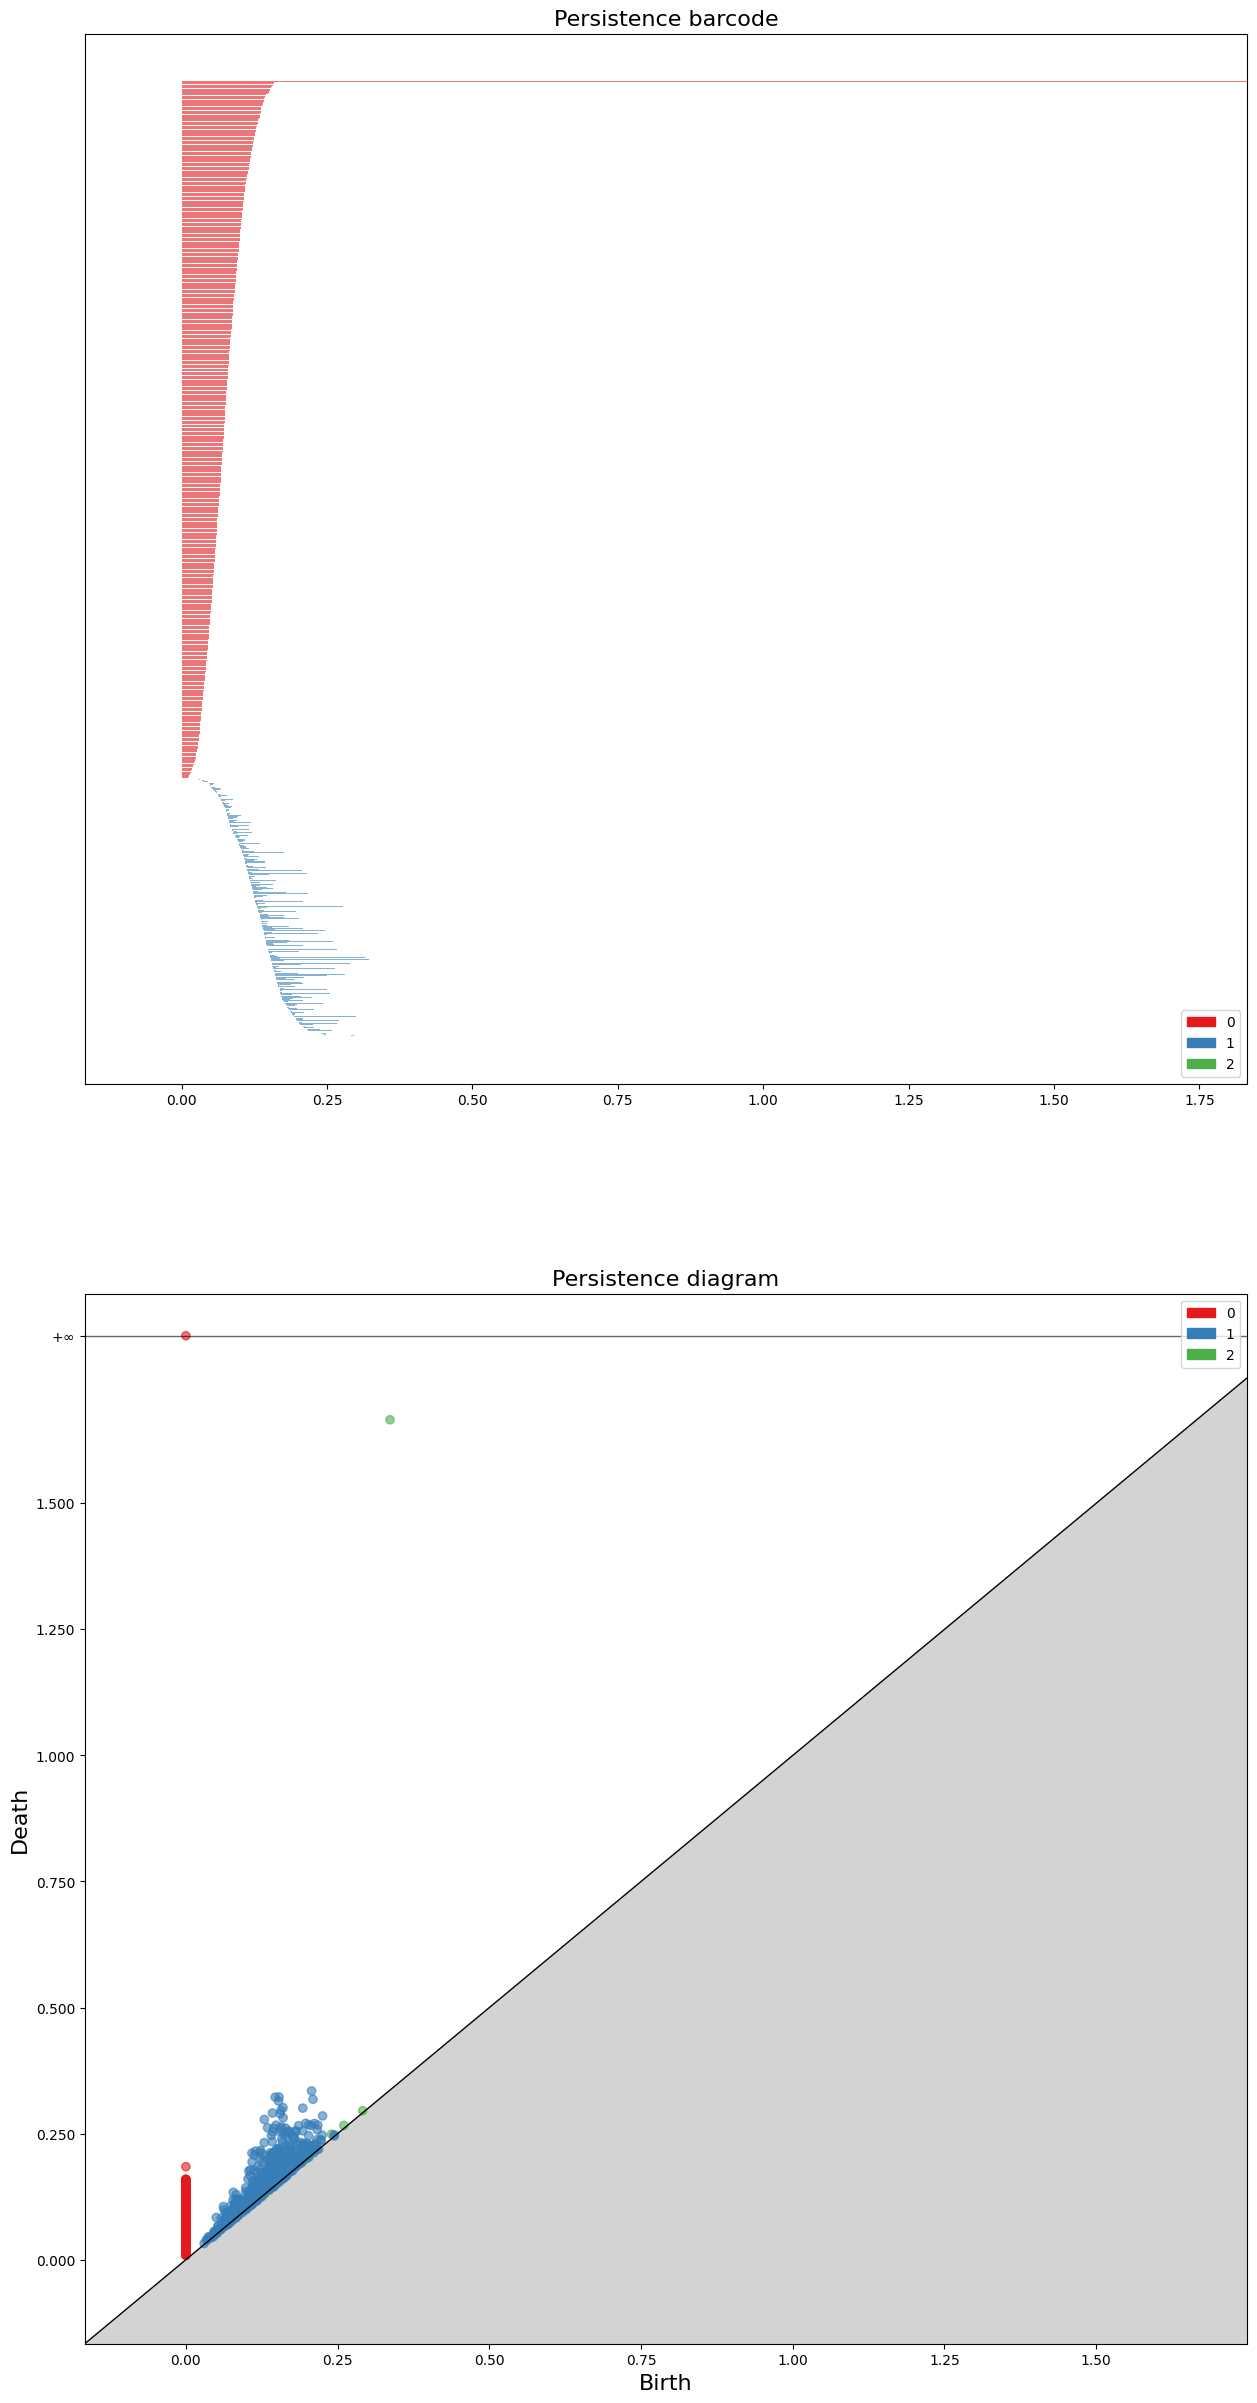

In [6]:
# Persistence barcode & diagram : Sphere

# Sphere 데이터로부터 rips complex 자료형을 계산합니다.
sphere_rips_complex = gudhi.RipsComplex(points=S_data[0], max_edge_length=2.0, sparse=0.5)

# Rips complex를 분석합니다.
sphere_simplex_tree = sphere_rips_complex.create_simplex_tree(max_dimension=3)

# Persistent homology를 계산합니다.
sphere_diag = sphere_simplex_tree.persistence(homology_coeff_field=2,
                                              min_persistence=0.0)

# 결과 시각화
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,30))
gudhi.plot_persistence_barcode(sphere_diag, axes=axs[0], legend=True)
gudhi.plot_persistence_diagram(sphere_diag, axes=axs[1], legend=True)
plt.show()

Persistence Barcode(PB)는 거리 파라미터가 증가할때마다 각 호몰로지 클래스들이 언제 탄생(birth)하고 

언제 소멸(death)하는지를 구간 $[b,d]$ 형태로 보여줍니다.

각 구간의 길이는 개별 호몰로지 클래스의 수명(lifespan) 또는 지속성(persistence)을 나타냅니다.

지속성이 긴 클래스는 다양체의 성질에서 얻어진 것이라 할 수 있고, 짧은 클래스는 노이즈에 의해 발생한 정보라고 할 수 있습니다.


Persistence Diagram(PD)은 PB에서 각 구간들의 탄생시점($b$)과 소멸시점($d$)을 좌표평면에 좌표 $(b,d)$로 나타낸 것으로, 두 자료형은 정확히 같은 정보를 나타내고 있습니다.

코드를 통해 얻은 PD에서 살펴볼 수 있듯, 위 데이터는 0th-homology class 하나와 2nd-homology class 하나가 무한한 지속성을 가지고 있는 것을 관찰할 수 있습니다.

여기서 원래 다양체 $S^2$가 가지는 호몰로지의 정보와 동일하다는 것을 관찰할 수 있습니다.

아래의 다른 예제들(토러스, 뫼비우스의 띠, 클레인 병)에서도 동일한 결과를 관찰할 수 있습니다.

#### Homology of Torus

$$\text{rank}{H_0(T^2)} = 1, \text{rank}{H_1(T^2)} = 2, \text{rank}{H_2(T^2)} = 1$$

In [7]:
# Persistence barcode & diagram : Torus

#### Homology of Mobius band

$$\text{rank}{H_0(M)} = 1, \text{rank}{H_1(M)} = 1, \text{rank}{H_2(M)} = 0$$

In [8]:
# Persistence barcode & diagram : Mobius band

#### Homology of Klein bottle

$$\text{rank}{H_0(K)} = 1, \text{rank}{H_1(K)} = 1, \text{rank}{H_2(K)} = 0$$

In [9]:
# Persistence barcode & diagram : Klein bottle

## 4. Machine Learning


<figure align = center>
<img src = 'https://github.com/SHlee-TDA/PNU_TDA_TUTORIAL/blob/main/figures/ml1.jpg?raw=true'>
<img src = 'https://github.com/SHlee-TDA/PNU_TDA_TUTORIAL/blob/main/figures/ml2.jpg?raw=true'>
</figure>

먼저 간단하게 머신러닝이란 무엇인지, 그리고 머신러닝은 전반적으로 어떤 과정을 거쳐 문제를 해결하는지 살펴봅시다.

머신러닝이란, 주어진 문제를 해결하기 위해 기계가 데이터에 잠재된 패턴을 스스로 학습하고 문제 해결에 최적화된 솔루션을 스스로 만들어내는 모델이라고 할 수 있습니다.

이때, 데이터가 가진 특징을 사용하는 방법을 사람이 지정해주는 것이 아니라 기계 스스로 학습하여 만들어내기 때문에 인공지능의 한 방법론이라 할 수 있습니다.

머신러닝은 일반적으로 다음과 같은 파이프라인을 거쳐 문제를 해결합니다.

> **Machine Learning Pipeline**
>
> 1. 문제정의 : 개와 고양이 사진을 구분하는 분류, 미래의 주가를 예측하는 회귀, 유사한 데이터를 모으는 군집 등으로 문제를 적절하게 정의합니다.
> 
> 2. 데이터 정제 및 가공 : 풀고자 하는 문제에 대한 데이터를 수집하고 머신러닝에 사용할 수 있도록 가공합니다.
> 
> 3. 모델 선택 및 학습 : 수집된 데이터의 포멧에 따라 혹은 정의된 문제에 따라 가장 적합한 머신러닝 모델을 선택하고 훈련 데이터를 학습시킵니다.
> 
> 4. 모델 평가 : 아직 관측되지 않은 데이터에 대해서도 훈련 상황과 유사한 성능이 나오는지를 평가합니다.
> 
> 5. 론칭 : 적절한 수준의 평가점수를 얻은 머신러닝 모델을 론칭합니다.



In [1]:
# Import necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import gudhi


from sklearn import svm
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


from gudhi.sklearn.cubical_persistence import CubicalPersistence
from gudhi.representations import DiagramSelector, Landscape

In [2]:
# Fix all randomnesses for reproducibility

def random_seed_fix(seed=42):
    random.seed(seed)
    np.random.seed(seed)

seed = 42
random_seed_fix(seed)

### 4.1) 데이터 소개 및 문제 정의

#### MNIST 손글씨 숫자 이미지 데이터

<figure align = 'center'>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png' width = 1000>
<figcaption> 
MNIST handwritten digit database, Yann LeCun et al.
</figcation>
</figure>

MNIST 손글씨 숫자 데이터는 머신러닝을 입문하기 위한 가장 대표적인 데이터로, 0~9까지의 손글씨 숫자가 7만장 준비되어 있습니다.

각 이미지는 0~255까지의 그래이 스케일 값을 가지는 28x28(784개)의 픽셀로 구성되어 있습니다.

또한 각 이미지가 어떤 숫자를 나타내는지 정답지도 구비되어 있습니다.

#### 이미지 분류 (Classification)

분류 문제는 가장 대표적인 머신러닝 문제입니다. 

분류 문제의 목표는 사진 데이터를 입력받으면, 이 사진이 어떤 숫자인지 말해주는 머신 혹은 함수를 만드는 것입니다.

머신러닝이 하는 역할은 이 문제를 위해 손수 모델링을 하는 것이 아니라, 모델이 훈련 데이터를 학습하여 출력 함수를 스스로 설계하도록 만드는 것입니다.

#### 호몰로지 클래스 분류 (Homology classification)

일반적인 MNIST 분류는 단순히 이미지가 어떤 숫자인지를 알아 맞히는 문제입니다.

그러나, 호몰로지 클래스 분류는 이미지가 가진 구멍의 개수를 알아 맞히는 문제입니다.

예를들어, 숫자 이미지 1은 구멍이 없으므로 0으로 예측하고, 숫자 이미지 0은 구멍이 하나 있으므로 1로 예측하고, 숫자 이미지 8은 구멍이 두 개 있으므로 2로 예측하길 원하는 것입니다.

### 4.2) 데이터 정제 및 가공

우리는 다음과 같이 데이터를 정제하고 가공할 것입니다.

- 훈련 데이터 샘플 수 : 7,000 개 (실험을 위한 성능의 제약과 메모리 사용량 완화를 위해)
  
- 데이터 포맷 : 이미지를 길이가 784인 벡터 형태로 입력받아 사용할 것입니다.
  
- 정규화 : 일부 머신러닝 모델들은 데이터의 스케일에 영향을 받으므로 0~255까지인 픽셀 값을 0~1까지의 값으로 정규화해줍니다. 

- 레이블 수정 : MNIST 데이터의 기본 레이블(정답)은 이미지가 나타내는 0~9 까지의 숫자로 되어 있습니다. 그러나, 우리가 풀 문제는 호몰로지 클래스를 분류하는 문제이므로, 숫자의 구멍의 개수에 따라 레이블을 수정해줍니다.

In [3]:
# data load
mnist = fetch_openml('mnist_784', as_frame=False)

# training/test data split 
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, train_size=0.1, random_state=seed)

# data normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

/Users/shlee/miniforge3/envs/test_env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# label transform
def homology_class(label):
    if label == '8':
        return 2
    elif label == '0' or label == '6' or label == '9':
        return 1
    else:
        return 0

y_train_hom = np.array(list(map(homology_class, y_train)))
y_test_hom = np.array(list(map(homology_class, y_test)))

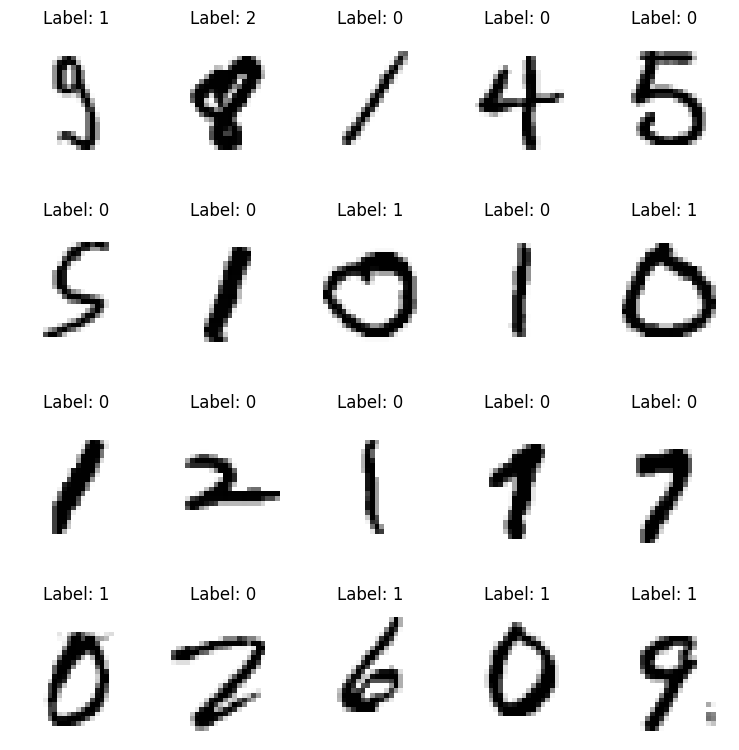

In [5]:
# Display data samples

num_img = 20
images = X_train[0:num_img]
images = images.reshape(num_img,28,28)
labels = y_train_hom[0:num_img]
num_row = 4
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))

for i in range(num_img):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')

plt.tight_layout()
plt.show()

### 4.3) 모델 선택 및 학습

우리는 가장 단순한 머신러닝 분류기인 '퍼셉트론'을 사용할 것입니다.
퍼셉트론은 뉴럴 네트워크의 기본 단위가 되는 선형 모델입니다.

<figure align = 'center'>
<img src = 'https://github.com/SHlee-TDA/Deep_Learning/blob/master/images/perceptron.png?raw=true'>
<figcaption> 퍼셉트론의 작동방식 도식화 </figcaption>
</figure>

퍼셉트론에 대한 자세한 설명은 다음 자료를 참고해주세요.
[[머신러닝 정리] 퍼셉트론 (Perceptron)](https://velog.io/@shlee0125/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%A0%95%EB%A6%AC-%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0-Perceptron)

사이킷런(`scikit-learn`) 라이브러리를 이용하면 퍼셉트론과 같은 머신러닝 모델을 쉽게 불러오고 학습시킬 수 있습니다.


In [6]:
# Model training
model = Perceptron(random_state=seed)



In [9]:
model.fit(X_train, y_train_hom)

Perceptron(random_state=42)

### 4.4) 모델 평가

모델 평가는 모델 학습에 사용되지 않은 테스트 데이터를 사용합니다.

이렇게 해서 모델이 얼마나 일반적인 상황에서 이 문제를 잘 해결할 수 있는지 평가합니다.

분류 모델 평가에는 '정확도(accuracy score)'를 사용합니다.

정확도는 테스트 데이터에 대한 모델의 예측 레이블과 정답 레이블을 각각 비교하여, 정답을 맞춘 비율을 계산합니다.

In [10]:
# Compute accuracy
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test_hom)

0.8229206349206349

우리 모델의 정확도가 약 82퍼센트가 나왔습니다.

모델의 성능을 조금 더 자세히 살펴보기 위해 오답분석표를 관찰할 수 있습니다.

**혼동행렬**(Confusion matrix)는 모델 예측의 정오표를 한눈에 쉽게 관찰할 수 있게 해줍니다.

혼동행렬의 각 행은 정답 레이블을, 각 열은 예측 레이블을 의미합니다.

혼동행렬의 대각성분은 예측을 정확히 한 데이터의 개수를 나타냅니다.

또한 대각성분이 아닌 성분을 관찰하면 모델이 주로 어떤 레이블에서 오답을 범했는지 직관을 얻을 수 있습니다.


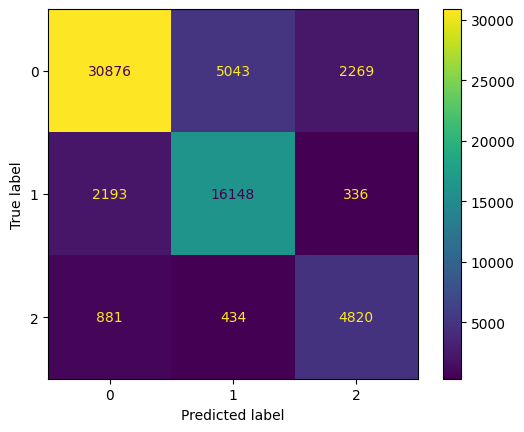

In [12]:
# Plot confusion matrix
cfs_mat = confusion_matrix(y_test_hom, y_pred)
ConfusionMatrixDisplay(cfs_mat).plot()

이 모델은 약 82퍼센트의 정확도를 가지고 있습니다.

오답을 분석하면 구멍이 없는 (True label = 0) 데이터를 상당히 많이 틀렸다는 것을 알 수 있습니다.


## 5. Machine Learning with TDA


우리가 훈련한 모델은 이미지의 픽셀값만을 입력받기 때문에 아마 픽셀 자리가 많이 겹치는 3이나 5를 각각 8이나 6 따위로 오해했을 가능성이 있습니다.

그러므로, 이미지의 픽셀값뿐만 아니라, **이미지가 가진 구멍의 개수에 대한 정보**를 추가적으로 입력하여 학습한다면 모델의 성능이 더욱 향상될 것이라고 기대할 수 있습니다.

호몰로지는 다양체가 가진 구멍의 개수에 대한 정보를 가져다 줍니다.
그러므로 이미지가 가진 PH를 계산하면 이미지가 가진 구멍의 개수에 대한 정보를 추정해낼 수 있습니다.

이 정보를 추가한다면, 호몰로지 클래스 분류 문제를 푸는 데에 도움이 될 것이라 생각할 수 있습니다.



#### Topological Feature Addition 
우리의 전략은 기존의 이미지 데이터에 이미지가 가진 구멍의 개수에 대한 정보를 Persistent homology를 이용해 추출하고 데이터에 추가해주는 것입니다.

이처럼 머신러닝에서 문제 해결에 유용할 것이라 생각되는 정보를 추가해 성능을 향상시키는 전략을 **Feature addition** 이라고 부릅니다.



#### Cubical Complex

이미지 데이터는 앞서 소개한 point cloud와는 달리 거리가 아니라 픽셀의 농도를 나타내는 gray scale을 파라미터로 사용하고 있습니다.

이러한 이미지 데이터로부터 위상적인 정보를 표현할 때는 Cubical Complex가 사용됩니다.

<figure align = 'center'>
<img src = 'https://github.com/SHlee-TDA/TDA_coding/blob/main/figures/cubical_complex-1.jpg?raw=true'>
<figcaption> Cubical complex</figcaption>
</figure>


Cubical complex는 정규화된 그리드 위에 점들이 있다고 생각하고, 점들마다 부여된 gray scale 값을 파라미터로 하여 각 점들을 연결해 나갑니다.

Simplicial complex와의 차이라면, simplicial complex는 삼각형과 정사면체를 기본 단위로 생각하지만, cubical complex는 사각형과 정육면체를 기본단위로 한다는 것입니다.

아래의 그림은 이미지 데이터로부터 PB와 PD를 그려나가는 과정을 보여줍니다.

<figure align = 'center'>
<img src = 'https://github.com/SHlee-TDA/TDA_coding/blob/main/figures/cubical_filtration-1.jpg?raw=true'>
<img src = 'https://github.com/SHlee-TDA/TDA_coding/blob/main/figures/cubical_PB-1.jpg?raw=true'>
<img src = 'https://github.com/SHlee-TDA/TDA_coding/blob/main/figures/cubical_PD-1.jpg?raw=true'>

<figcaption> (1) Cubical filtration 과정 (2) 위 과정을 통해 얻어진 Persistence barcode (3) 동일한 정보를 나타내는 Persistence diagram </figcaption>
</figure>

### 5.1) Topological Data Analysis

먼저, 이미지 데이터의 위상적 특징을 분석하기 위해 이미지 데이터로부터 PH를 계산해 관찰합니다.



usetex mode requires TeX.


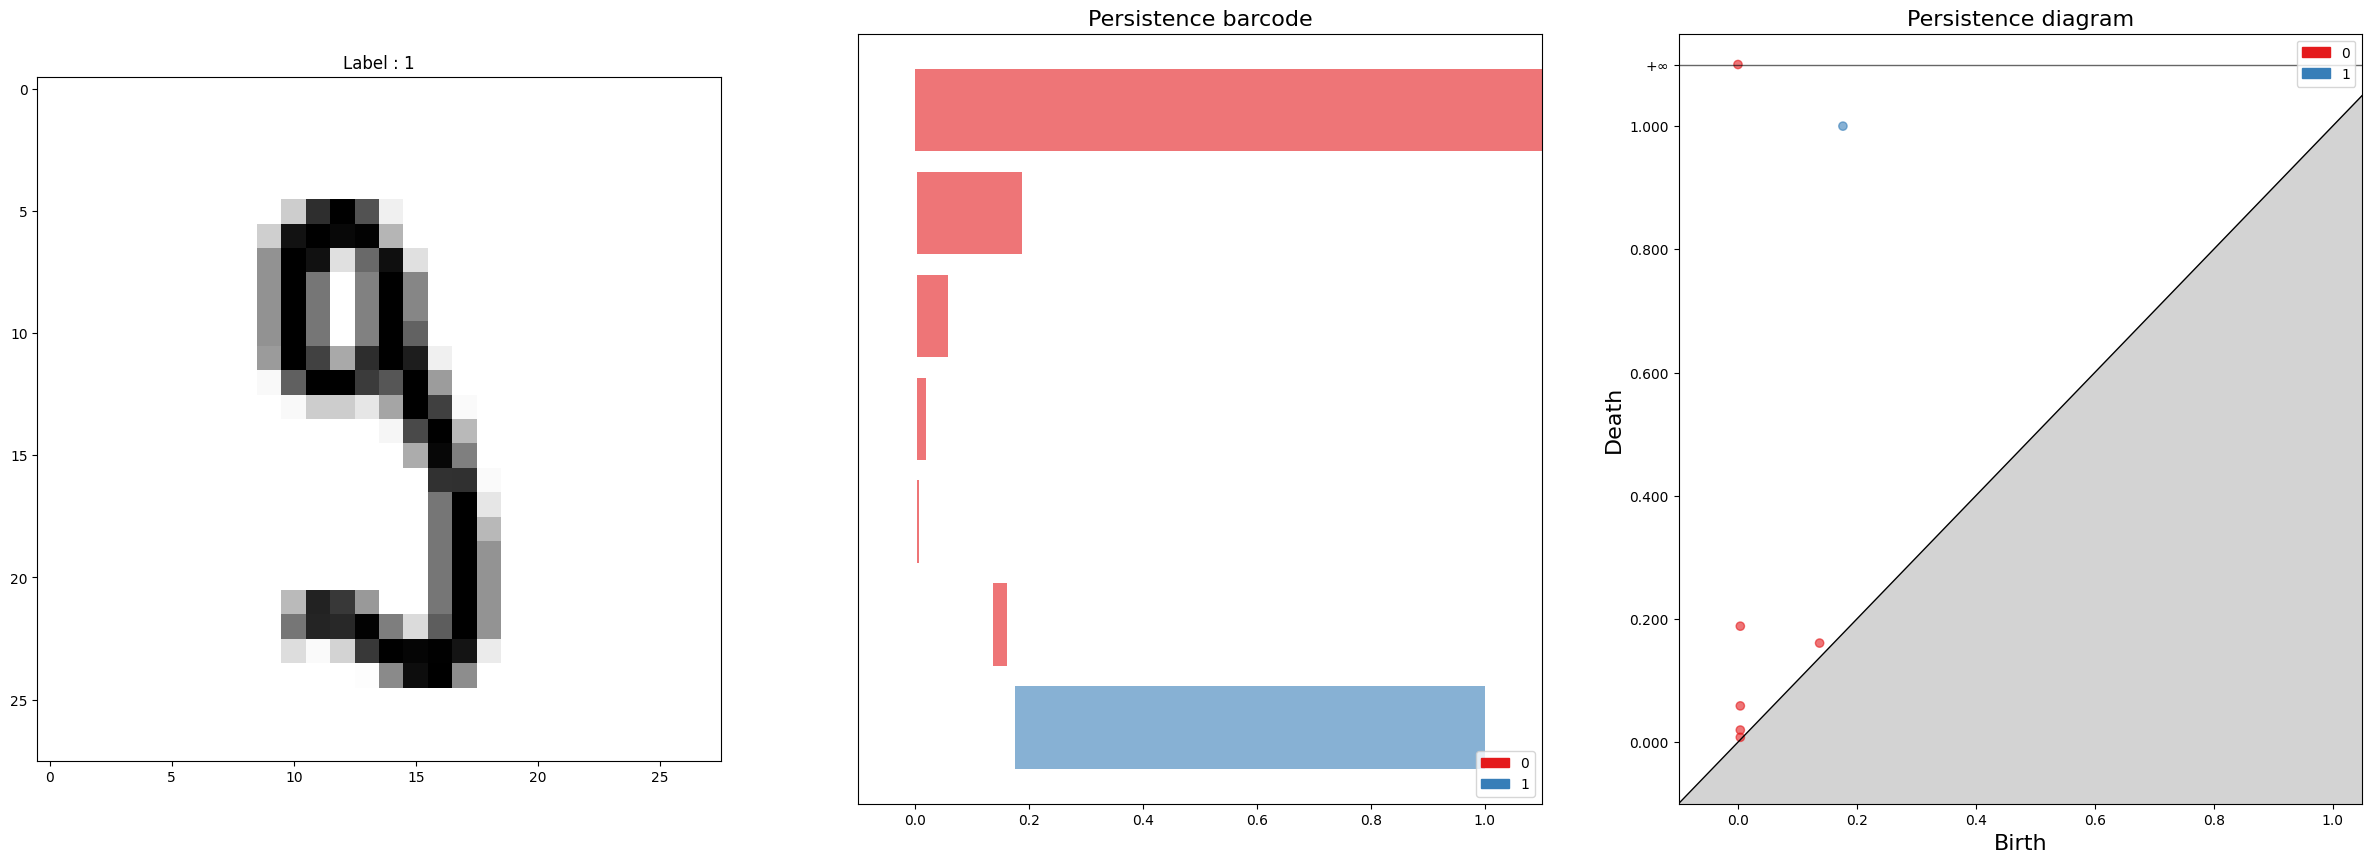

In [13]:
# Persistent homology for Image data

sample = 0

cc = gudhi.CubicalComplex(dimensions=[28,28], top_dimensional_cells=1-X_train[sample])
diag = cc.persistence(homology_coeff_field=2)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10))

axs[0].imshow(X_train[sample].reshape(28,28), cmap='gray_r')
axs[0].set_title(f'Label : {y_train_hom[sample]}')
gudhi.plot_persistence_barcode(diag, axes=axs[1], legend=True)
gudhi.plot_persistence_diagram(diag, axes=axs[2], legend=True)
plt.show()

위 코드를 통해 데이터를 분석해보면 1st Persistent homology가 보여주는 긴 바코드의 개수가 이미지의 구멍의 개수로 근사하는 것을 관찰할 수 있습니다.

이로부터 PH가 이 문제를 해결하는 데에 도움이 되는 정보라는 것을 유추할 수 있습니다.

이제 이 정보를 어떻게 데이터에 추가할 수 있을까요?


#### 

### 5.2) Vectorization

일반적인 머신러닝 모델들은 샘플마다 고정된 길이의 벡터를 입력으로 받습니다.

그러나, 샘플의 위상적인 정보를 담고 있는 Persistence barcode 또는 Persistence diagram 자료형은 샘플마다 그 길이(바코드의 개수)가 다릅니다.

따라서, PB의 정보는 최대한 유지하면서 고정된 길이의 벡터 형태로 요약하는 **벡터화**(Vectorization) 과정이 필요합니다.

여기서는 **Persistence Landscape** [Peter Bubenik, 2015]를 사용할 것입니다.

간략히 말하자면, Persistence Landscape는 Persistence barcode의 각 바코드를 piecewise linear function들로 변환한 뒤, piecewise linear function들을 고정된 길이의 벡터로 저장하는 것입니다.

Persistence Landscape에 대한 자세한 설명은 다음 영상을 참고해주세요. [https://youtu.be/CQJQg3Ai0ZQ]

우리는 이미지 벡터 뒤에 Persistence Landscape 벡터를 붙여(concatenate) 새로운 입력 데이터로 사용할 것입니다.

<figure align = 'center'>
<img src = 'https://github.com/SHlee-TDA/TDA_coding/blob/main/figures/vectorization.png?raw=true'>
<figcaption> 데이터 벡터화 과정의 도식화</figcaption>
</figure>

In [14]:
# Topological features

PH0 = CubicalPersistence(homology_dimensions=0, homology_coeff_field=2, newshape=[-1,28,28], n_jobs=-1)
PH1 = CubicalPersistence(homology_dimensions=1, homology_coeff_field=2, newshape=[-1,28,28], n_jobs=-1)
PL = Landscape(num_landscapes=10, resolution=50)

def topological_vector(X_data):
    X_data_ = np.ones_like(X_data) - X_data

    # Generate persistence diagram for input dataset.
    pd0 = PH0.fit_transform(X_data)
    pd1 = PH1.fit_transform(X_data_)

    # We only use finite length points.
    pd0 = DiagramSelector(use=True, point_type='finite').fit_transform(pd0)
    pd1 = DiagramSelector(use=True, point_type='finite').fit_transform(pd1)

    # Generate persistence landscape for each dimensional persistence diagram.
    pl0 = PL.fit_transform(pd0)
    pl1 = PL.fit_transform(pd1)

    # Our output vector is of the shape [image vector, 0th-PL, 1st-PL].
    return np.concatenate([X_data, pl0, pl1], axis=1)   

In [15]:
# feature addition 
X_train_top = topological_vector(X_train)
X_test_top = topological_vector(X_test)
X_train_top.shape, X_test_top.shape

((7000, 1784), (63000, 1784))

### 5.3) 모델 학습 및 평가

이제 새롭게 얻은 데이터로 학습해 지난 모델에 비해 얼마나 성능이 향상되는지 비교해봅시다.

실험의 형평성을 위해 우리의 모델은 여전히 똑같은 퍼셉트론 모델입니다.

변한 것은 학습 데이터에 위상적인 정보가 추가된 것 뿐입니다.

In [16]:
# model setting
model_tda = Perceptron(random_state=seed)

In [17]:
# model fitting
model_tda.fit(X_train_top, y_train_hom)

Perceptron(random_state=42)

In [18]:
# model evaluation
y_pred = model_tda.predict(X_test_top)
accuracy_score(y_pred, y_test_hom)

0.9128095238095238

모델 평가 결과, 정확도가 기존의 약 82%에서 약 91%로, 9% 가량 성능이 향상된 것을 확인할 수 있습니다.



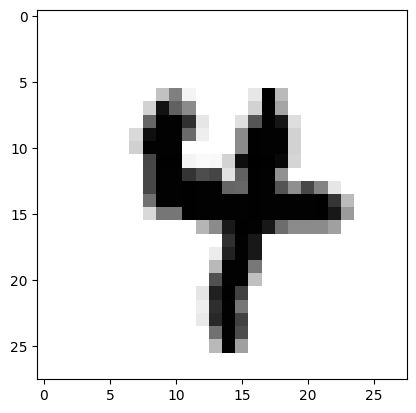

In [19]:
# Experiment

image = X_test[1]
plt.imshow(image.reshape(28,28), cmap = 'gray_r')

In [20]:
pred1 = model.predict(image[None,:])
pred2 = model_tda.predict(topological_vector(image[None, :]))

print(f'일반 퍼셉트론 모델 : 이 숫자 이미지에는 구멍이 {pred1}개 있습니다.')
print(f'TDA 퍼셉트론 모델 : 이 숫자 이미지에는 구멍이 {pred2}개 있습니다.')

일반 퍼셉트론 모델 : 이 숫자 이미지에는 구멍이 [1]개 있습니다.
TDA 퍼셉트론 모델 : 이 숫자 이미지에는 구멍이 [0]개 있습니다.


혼동행렬을 관찰하면, 기존의 모델이 구멍이 없는데도 구멍이 있다고 했던 샘플에 대한 오답을 새로운 모델에서 상당히 개선해냈음을 알 수 있습니다.

이로부터 Persistent homology에 대한 정보를 추가하는 것이 머신러닝의 성능을 향상시킬 수 있음을 관찰할 수 있습니다.

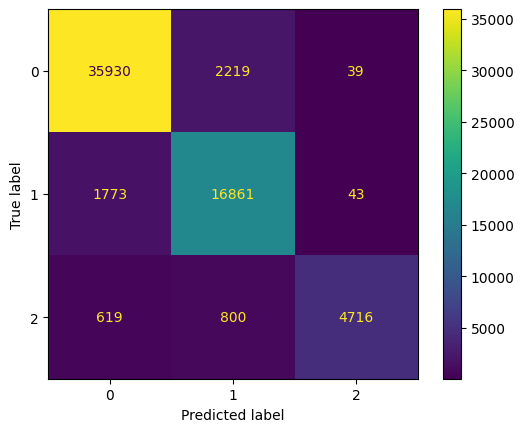

In [22]:
cfs_mat = confusion_matrix(y_test_hom, y_pred)
ConfusionMatrixDisplay(cfs_mat).plot()

## 마무리

지금까지 TDA를 이용해 데이터로부터 기하학적 정보를 추출하는 방법과 이를 머신러닝에 응용하는 방법에 대해 살펴보았습니다.

TDA는 다양한 데이터에 다양한 방식으로 응용될 수 있습니다.

특히, 기존의 여러 머신러닝 방법들은 데이터의 국소적 특징(local feature)을 분석하고 추출하는 방법을 취하곤 합니다.

데이터의 대역적인 특징(global feature)을 추출하는 TDA를 머신러닝과 함께 사용하고자 하는 것은 수학자에겐 자연스러운 아이디어일 것입니다.

이로부터 기존의 머신러닝과 데이터 분석에서 더욱 향상된 성능을 기대할 수 있습니다.

모든 것은 여러분의 아이디어에 달려있습니다.

이 튜토리얼을 통해 여러분의 학습과 연구에 새로운 인사이트가 생기길 바랍니다.

여기까지 학습하시느라 수고가 많으셨습니다.

감사합니다.

-포항공과대학교 인공지능대학원 박사과정 이성헌-

> References)
>
> 1. Weinberger, Shmuel. "What is... persistent homology." Notices of the AMS 58.1 (2011): 36-39.
> 2. Carlsson, Gunnar. "Topology and data." Bulletin of the American Mathematical Society 46.2 (2009): 255-308.
> 3. Garin, Adélie, and Guillaume Tauzin. "A topological" reading" lesson: Classification of MNIST using TDA." 2019 18th IEEE International Conference On Machine Learning And Applications (ICMLA). IEEE, 2019.
> 4. Bubenik, Peter. "Statistical topological data analysis using persistence landscapes." J. Mach. Learn. Res. 16.1 (2015): 77-102.
> 5. Maria, Clément, et al. "The gudhi library: Simplicial complexes and persistent homology." International congress on mathematical software. Springer, Berlin, Heidelberg, 2014.
> 6. LeCun, Yann. "The MNIST database of handwritten digits." http://yann. lecun. com/exdb/mnist/ (1998).
> 7. Otter, Nina, et al. "A roadmap for the computation of persistent homology." EPJ Data Science 6 (2017): 1-38. 